## Explaination for Deep Neural Network in theoritical sight

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
%matplotlib inline

In [3]:
x = np.arange(-6, 6, .01)
err = (np.random.random(x.shape) - .5) * .1

def tmp1(estimating = False):
    fig = plt.figure(figsize = (15, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(x) + err, '.k')
    if estimating:
        ax.plot(x, np.sin(x), '-r', linewidth = 3)
        
interact(tmp1, estimating = False)

interactive(children=(Checkbox(value=False, description='estimating'), Output()), _dom_classes=('widget-intera…

<function __main__.tmp1(estimating=False)>

In [4]:
x = np.arange(-6, 6, .01)
err = (np.random.random(x.shape) - .5)
def tmp(pr = 2, red = False):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(5*x)/5 + (x-2)*(x-1)*(x+3)*(x-3)*(x+4)/2000 + err * pr, '.')
    if red:
        # ax.set_title('Loss : {}'.format((((np.sin(5*x)/5 + (x-2)*(x-1)*(x+3)*(x-3)*(x+4)/2000 + err * pr) - ((x+1)**3 /150 - .2))**2).sum() / x.shape[0]))
        ax.plot(x, (x+1)**3 /150 - .2, '-r', linewidth = 3)
        
interact(tmp, pr = (0, 2, .01), red = False)

interactive(children=(FloatSlider(value=2.0, description='pr', max=2.0, step=0.01), Checkbox(value=False, desc…

<function __main__.tmp(pr=2, red=False)>

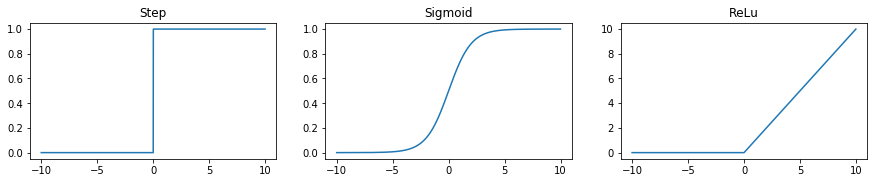

In [5]:
def f(x):
    x[x < 0] = 0
    x[x > 0] = 1
    return x # step function

def g(x):
    return 1/(1 + np.exp(-x)) # sigmoid
# f test
fig = plt.figure(figsize = (15, 2.5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(np.arange(-10, 10, .01), f(np.arange(-10, 10, .01)))
ax1.set_title('Step')
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(np.arange(-10, 10, .01), g(np.arange(-10, 10, .01)))
ax2.set_title('Sigmoid')
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(np.arange(-10, 10, .01), np.max(np.concatenate((np.arange(-10, 10, .01).reshape((1, 2000)), np.zeros((1, 2000))), axis = 0), axis = 0))
ax3.set_title('ReLu')
print('', end = '')

In [6]:
yy = (np.random.random(3)-.5)*8
def p1(a1, a2, b1, b2, c1, c2, d1, d2):
    x = np.arange(-10, 10, .01)
    y1 = a1*f(a2*x+b2)+b1
    y2 = c1*f(c2*x+d2)+d1
    plt.plot(x, y1+y2)
    xx = np.array([-7.5, 0, 7.5])
    plt.plot([-7.5, 0, 7.5], yy, 'o')
    loss = ((yy - (a1*f(a2*xx+b2)+b1) - (c1*f(c2*xx+d2)+d1))**2).sum() / 3
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-5, 5)

interact(p1, a1 = (-6, 6, .01), b1 = (-6, 6, .01), c1 = (-6, 6, .01), d1 = (-6, 6, .01), a2 = (-6, 6, .01), b2 = (-6, 6, .01), c2 = (-6, 6, .01), d2 = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a1', max=6.0, min=-6.0, step=0.01), FloatSlider(valu…

<function __main__.p1(a1, a2, b1, b2, c1, c2, d1, d2)>

### Loss function
$$L = \frac{1}{N}\sum_{i}^{N} \left({y_{i}} - \bar{y_{i}}\right)^{2} \\
= \frac{1}{N}\sum_{i}^{N} \left[{y_{i}} - \left(a_{1} f(a_{2}x_{i} + b_{2}) + b_{1} + c_{1} f(c_{2}x_{i} + d_{2}) + d_{1}\right)\right] ^{2} $$

In [8]:
zz = (np.random.random(36)-.5)
zz[:12] += yy[0]
zz[12:24] += yy[1]
zz[24:36] += yy[2]

def p2(a1, a2, b1, b2, c1, c2, d1, d2):
    x = np.arange(-10, 10, .01)
    y1 = a1*f(a2*x+b2)+b1
    y2 = c1*f(c2*x+d2)+d1
    plt.plot(x, y1+y2)
    xx = np.arange(-9, 9, .5)
    plt.plot(xx, zz, 'o')
    loss = ((zz - (a1*f(a2*xx+b2)+b1) - (c1*f(c2*xx+d2)+d1))**2).sum() / 36
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-5, 5)

interact(p2, a1 = (-6, 6, .01), b1 = (-6, 6, .01), c1 = (-6, 6, .01), d1 = (-6, 6, .01), a2 = (-6, 6, .01), b2 = (-6, 6, .01), c2 = (-6, 6, .01), d2 = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a1', max=6.0, min=-6.0, step=0.01), FloatSlider(valu…

<function __main__.p2(a1, a2, b1, b2, c1, c2, d1, d2)>

In [9]:
zz = (np.random.random(36)-.5)
zz[:12] += yy[0]
zz[12:24] += yy[1]
zz[24:36] += yy[2]

def p2(a1, a2, b1, b2, c1, c2, d1, d2):
    x = np.arange(-10, 10, .01)
    y1 = a1*g(a2*x+b2)+b1
    y2 = c1*g(c2*x+d2)+d1
    plt.plot(x, y1+y2)
    xx = np.arange(-9, 9, .5)
    plt.plot(xx, zz, 'o')
    loss = ((zz - (a1*g(a2*xx+b2)+b1) - (c1*g(c2*xx+d2)+d1))**2).sum() / 36
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-5, 5)

interact(p2, a1 = (-6, 6, .01), b1 = (-6, 6, .01), c1 = (-6, 6, .01), d1 = (-6, 6, .01), a2 = (-6, 6, .01), b2 = (-30, 30, .01), c2 = (-6, 6, .01), d2 = (-30, 30, .01))

interactive(children=(FloatSlider(value=0.0, description='a1', max=6.0, min=-6.0, step=0.01), FloatSlider(valu…

<function __main__.p2(a1, a2, b1, b2, c1, c2, d1, d2)>

### 위를 네트워크로 표현
![''](5833a648-6709-4a63-818f-e55a33e6d919.png)

In [10]:
zz = np.random.random(36)
zz[:18] *= .6
zz[18:] = 1-((1-zz[18:]) *.6)
zz[zz >= .5] = 1
zz[zz < .5] = 0

def p2(a1, a2, b1, b2, c1, c2, d1, d2):
    x = np.arange(-10, 10, .01)
    y1 = a1*f(a2*x+b2)+b1
    y2 = c1*f(c2*x+d2)+d1
    plt.plot(x, y1+y2)
    xx = np.arange(-9, 9, .5)
    plt.plot(xx, zz, 'o')
    loss = ((zz - (a1*f(a2*xx+b2)+b1) - (c1*f(c2*xx+d2)+d1))**2).sum() / 36
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-1, 2)

interact(p2, a1 = (-6, 6, .01), b1 = (-6, 6, .01), c1 = (-6, 6, .01), d1 = (-6, 6, .01), a2 = (-6, 6, .01), b2 = (-6, 6, .01), c2 = (-6, 6, .01), d2 = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a1', max=6.0, min=-6.0, step=0.01), FloatSlider(valu…

<function __main__.p2(a1, a2, b1, b2, c1, c2, d1, d2)>

In [11]:
zz = np.random.random(36)
zz[:18] *= .6
zz[18:] = 1-((1-zz[18:]) *.6)
zz[zz >= .5] = 1
zz[zz < .5] = 0

def p2_0(a1, a2, b1, b2, c1, c2, d1, d2):
    x = np.arange(-10, 10, .01)
    y1 = a1*g(a2*x+b2)+b1
    y2 = c1*g(c2*x+d2)+d1
    plt.plot(x, g(y1+y2))
    xx = np.arange(-9, 9, .5)
    plt.plot(xx, zz, 'o')
    loss = ((zz - g((a1*g(a2*xx+b2)+b1) + (c1*g(c2*xx+d2)+d1)))**2).sum() / 36
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-1, 2)

interact(p2_0, a1 = (-6, 6, .01), b1 = (-6, 6, .01), c1 = (-6, 6, .01), d1 = (-6, 6, .01), a2 = (-6, 6, .01), b2 = (-6, 6, .01), c2 = (-6, 6, .01), d2 = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a1', max=6.0, min=-6.0, step=0.01), FloatSlider(valu…

<function __main__.p2_0(a1, a2, b1, b2, c1, c2, d1, d2)>

### An example of the gradient
![''](bdc21e4c-4a7f-4df1-bf05-82c41b6831a0.png)

In [12]:
x = np.arange(-10, 10, .01)
err = (np.random.random(x.shape)-.5)
yy = x/3 + 1 + err

def p3(a, b):
    y = a*x + b
    plt.plot(x, yy, '.')
    plt.plot(x, y, 'r-')
    loss = ((yy - y)**2).sum() / y.shape[0]
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-5, 5)

interact(p3, a = (-6, 6, .01), b = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-6.0, step=0.01), FloatSlider(value…

<function __main__.p3(a, b)>

In [13]:
va = np.arange(-1.2, 1.2, .02)
vb = np.arange(-6, 6, .1)
x = np.arange(-10, 10, .01)

A, B = np.meshgrid(va, vb)
# L = np.load('Loss.npy')
L = np.zeros(A.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        a = A[i, j]
        b = B[i, j]
        y = a*x + b
        L[i, j] = ((yy - y)**2).sum() / y.shape[0]
        print('({}, {})      '.format(i, j), end = '\r')
np.save('Loss.npy', L)

In [14]:
from mpl_toolkits import mplot3d
x = np.arange(-10, 10, .01)
y = x/3 + 1

def p_tmp(e = 30, a = 45):
    fig = plt.figure(figsize = (15, 15))
    ax3d = plt.axes(projection='3d')
    ax3d.plot_surface(A, B, L, cmap = 'plasma')
    ax3d.scatter3D(1/3, 1, ((yy - y)**2).sum() / y.shape[0], c = [[0, 1, 0]])
    ax3d.view_init(elev = e, azim = a)
interact(p_tmp, e = (-90, 90, 1), a = (-180, 180, 1))

interactive(children=(IntSlider(value=30, description='e', max=90, min=-90), IntSlider(value=45, description='…

<function __main__.p_tmp(e=30, a=45)>

In [15]:
def bce(gt, data):
    N = gt.shape[0]
    L = -1/N * (gt * np.log(data) + (1 - gt) * np.log(1 - data)).sum()
    return L

## Binary Classification : 긴가민가 모델
---
### Loss Function : Mean Squared Error
$$L = \frac{1}{N}\sum_{i} (y_{i} - \bar{y_{i}})^2$$

Text(0.5, 1.0, 'y = 1')

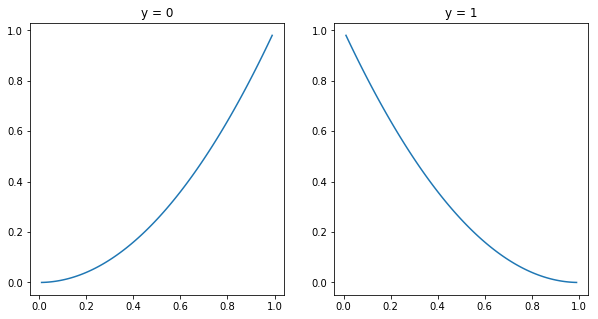

In [16]:
tx = np.arange(.01, 1, .01)
t0 = tx**2
t1 = (1 - tx)**2
fig = plt.figure(figsize = (10, 5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
ax0.plot(tx, t0)
ax0.set_title('y = 0')
ax1.plot(tx, t1)
ax1.set_title('y = 1')

In [17]:
zz = np.random.random(36)
zz[:12] *= .53
zz[24:] = 1-((1-zz[24:]) *.53)
zz[zz >= .5] = 1
zz[zz < .5] = 0

def p2_1(a, b):
    x = np.arange(-10, 10, .01)
    y1 = g(a*x+b)
    plt.plot(x, y1)
    xx = np.arange(-9, 9, .5)
    plt.plot(xx, zz, 'o')
    loss = ((zz - g(a*xx+b))**2).sum() / 36
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-1, 2)

interact(p2_1, a = (-6, 6, .01), b = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-6.0, step=0.01), FloatSlider(value…

<function __main__.p2_1(a, b)>

### Loss Function : Binary Cross Entropy
$$L = -\frac{1}{N}\sum_{i} \left[ y_{i}{\rm log}\bar{y_{i}} + (1 - y_{i}){\rm log}(1 - \bar{y_{i}})\right] $$

Text(0.5, 1.0, 'y = 1')

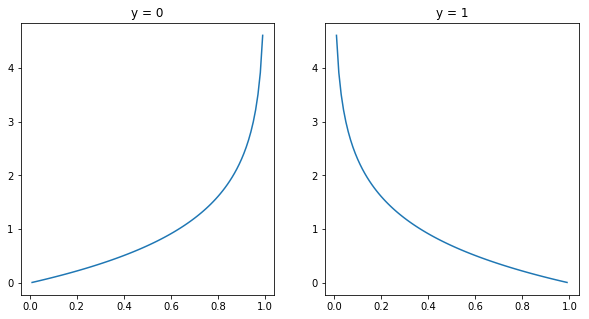

In [18]:
tx = np.arange(.01, 1, .01)
t0 = -np.log(1 - tx)
t1 = -np.log(tx)
fig = plt.figure(figsize = (10, 5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
ax0.plot(tx, t0)
ax0.set_title('y = 0')
ax1.plot(tx, t1)
ax1.set_title('y = 1')

In [19]:
def p2_2(a, b):
    x = np.arange(-10, 10, .01)
    y1 = g(a*x+b)
    plt.plot(x, y1)
    xx = np.arange(-9, 9, .5)
    plt.plot(xx, zz, 'o')
    loss = bce(zz, g(a*xx+b))
    plt.title('Loss = {}'.format(loss))
    plt.ylim(-1, 2)

interact(p2_2, a = (-6, 6, .01), b = (-6, 6, .01))

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-6.0, step=0.01), FloatSlider(value…

<function __main__.p2_2(a, b)>

### Summary
- DNN란 특정 모델의 coefficients를 변수로 놓고 주어진 data에 가장 fit한 변수를 찾는 과정. 보통, 변수화된 coefficients를 weights라 지칭.
- Loss function은 값이 작을 수록 모델의 예측값이 fit함을 나타낼 수 있는 함수
- Loss function의 minimization을 위해, 일반적으로, 모델은 미분이 잘 알려진 함수들의 합성 함수로 구성